In [2]:
import pandas as pd

# 사용자 정의함수 경로 설정
import sys
sys.path.append("G:/내 드라이브/Source/_Custom_Function")
# 사용자 정의함수 불러오기

import time

import ExcelFile_Merge as em
import ExcelFile_Read as er
import ExcelFile_EDA as ee

### 생활이동_행정동_2020.02.csv 불러오기

In [4]:
start_time = time.time()
filepath = 'G:\\내 드라이브\\DataSet\\_최종 병합 파일\\서울 생활이동\\2020\\'
filename = '생활이동_행정동_2020.02'
path = filepath + filename + '.csv'
df_dask = er.Read_dask(path)
print("Read_dask time :", time.time() - start_time)

Read_dask time : 0.9837040901184082


In [7]:
from dask.diagnostics import ProgressBar
from time import sleep
pbar = ProgressBar()
pbar.register()

start_time = time.time()
df_dask_rtn = df_dask.compute()
print("compute time :", time.time() - start_time)

[########################################] | 100% Completed | 88.04 s
compute time : 88.38867402076721


In [10]:
df_dask_rtn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110094197 entries, 0 to 1412649
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 행정동 코드    int64 
 4   도착 행정동 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 9.0+ GB


In [16]:
df_dask_rtn.count()

대상연월           110094197
요일             110094197
도착시간           110094197
출발 행정동 코드      110094197
도착 행정동 코드      110094197
성별             110094197
나이             110094197
이동유형           110094197
평균 이동 시간(분)    110094197
이동인구(합)        110094197
dtype: int64

In [12]:
df_dask_rtn['대상연월'].value_counts()

대상연월
202002    110094197
Name: count, dtype: int64

In [14]:
# H : 거주지로 추정되는 곳 (야간상주지)
# W : 근무지 또는 학교로 추정되는 곳 (주간상주지)
# E : 야간상주지와 주간상주지가 아닌 지역
df_dask_rtn['이동유형'].value_counts()

이동유형
EH    24472231
HE    22264425
EE    20257381
WH    12627680
HW    12030764
WE     9585145
EW     6676153
WW     1572948
HH      607470
Name: count, dtype: int64

In [18]:
df_dask_rtn.isnull().sum()

대상연월           0
요일             0
도착시간           0
출발 행정동 코드      0
도착 행정동 코드      0
성별             0
나이             0
이동유형           0
평균 이동 시간(분)    0
이동인구(합)        0
dtype: int64

---
### '이동유형' == 'WH' & '도착시간' [7, 8, 9] 인 데이터 조회

In [20]:
cond1 = df_dask_rtn['이동유형'] == 'HW'
cond2 = df_dask_rtn['도착시간'].isin([7, 8, 9])
df_출근 = df_dask_rtn[cond1 & cond2]

In [22]:
df_출근.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6304230 entries, 172670 to 1308777
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 행정동 코드    int64 
 4   도착 행정동 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 529.1+ MB


---
### '이동인구(합)' 컬럼 float형으로 변경

In [25]:
df_출근.loc[df_출근['이동인구(합)'] == '*','이동인구(합)'] = '0'

In [27]:
df_출근 = df_출근.astype({ '이동인구(합)' : 'float' })

In [29]:
df_출근.head()

,대상연월,요일,도착시간,출발 행정동 코드,도착 행정동 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
172670,202002,일,8,1101053,1101053,F,20,HW,10,0.00
172672,202002,일,8,1101053,1101053,F,25,HW,10,0.00
172674,202002,일,8,1101053,1101053,F,30,HW,10,7.14
172678,202002,일,8,1101053,1101053,F,35,HW,10,3.00
172683,202002,일,8,1101053,1101053,F,50,HW,60,3.10


---
### 행정동 기준으로 '이동인구(합)'의 계 구함

In [32]:
# grp_출근 = df_출근.groupby(['도착 행정동 코드'])['이동인구(합)'].sum().reset_index()
grp_출근 = df_출근.groupby(['도착 행정동 코드', '이동유형', '도착시간'])['이동인구(합)'].sum().reset_index()

In [56]:
grp_출근.count()

읍면동        1142
이동인구(합)    1142
dtype: int64

In [34]:
grp_출근.sort_values(by=['이동인구(합)'],ascending=False)

,도착 행정동 코드,이동인구(합)
299,1119054,1487123.74
378,1123064,1467572.10
21,1101061,1069647.60
289,1118051,909344.29
33,1102055,738214.54
...,...,...
579,2331041,26.29
1100,3127040,22.44
987,3120027,21.76
1017,3122032,6.48


In [36]:
grp_출근.rename(columns = {"도착 행정동 코드": "읍면동"}, inplace = True)

In [38]:
grp_출근.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   읍면동      1142 non-null   int64  
 1   이동인구(합)  1142 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 18.0 KB


---
### 행정동 코드 가져오기

In [41]:
start_time = time.time()
filepath = 'G:\\내 드라이브\\DataSet\\_최종 병합 파일\\서울 생활이동\\'
filename = '서울생활이동데이터_행정동코드_20210907'
path = filepath + filename + '.csv'
df_dong = pd.read_csv(path, low_memory=False)
print("read_csv time :", time.time() - start_time)
df_dong.head()

read_csv time : 0.03528189659118652


,시도,시군구,읍면동,name,full_name
0,11000,11010,1101053,사직동,서울특별시 종로구 사직동
1,11000,11010,1101054,삼청동,서울특별시 종로구 삼청동
2,11000,11010,1101055,부암동,서울특별시 종로구 부암동
3,11000,11010,1101056,평창동,서울특별시 종로구 평창동
4,11000,11010,1101057,무악동,서울특별시 종로구 무악동


---
### '읍면동' 코드 기준으로 조인

In [44]:
df_출근 = pd.merge(left = grp_출근 , right = df_gu, how = "left", on = "읍면동")

In [46]:
df_출근.sort_values(by=['이동인구(합)'],ascending=False).head(10)

,읍면동,이동인구(합),시도,시군구,name,full_name
299,1119054,1487123.74,11000,11190,여의동,서울특별시 영등포구 여의동
378,1123064,1467572.10,11000,11230,역삼1동,서울특별시 강남구 역삼1동
21,1101061,1069647.60,11000,11010,종로1·2·3·4가동,서울특별시 종로구 종로1·2·3·4가동
289,1118051,909344.29,11000,11180,가산동,서울특별시 금천구 가산동
33,1102055,738214.54,11000,11020,명동,서울특별시 중구 명동
355,1122053,690428.63,11000,11220,서초3동,서울특별시 서초구 서초3동
276,1117054,620577.15,11000,11170,구로3동,서울특별시 구로구 구로3동
31,1102052,606986.46,11000,11020,소공동,서울특별시 중구 소공동
32,1102054,590607.98,11000,11020,회현동,서울특별시 중구 회현동
374,1123058,562197.22,11000,11230,삼성1동,서울특별시 강남구 삼성1동


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# 패키지 임포트
import numpy as np                  # Numpy(넘파이) 패키지 임포트
import pandas as pd                 # pandas(판다스) 패키지 임포트
import matplotlib.pyplot as plt     # Matplotlib(맷플롯립) 패키지의 pyplot모듈을 plt로 임포트
from matplotlib import rcParams     # 한글 환경 설정을 위한 rcParams 임포트
import seaborn as sns               # seaborn(씨본) 패키지 임포트
import warnings

# 한글 환경 설정
def setting_styles_basic():
  rcParams['font.family'] = 'Malgun Gothic'     # Window
  #rcParams['font.family'] = 'NanumBarunGothic'    # Window
  # rcParams['font.family'] = 'AppleGothic'       # Max

  rcParams['axes.unicode_minus'] = False

setting_styles_basic()

# 경고창 무시
warnings.filterwarnings('ignore')

In [50]:
# 그래프의 스케일(scale)조정
sns.set_context('paper', # notebook, talk, poster
                rc = {
                    'font.size' : 10,
                    'xtick.labelsize' : 10,
                    'ytick.labelsize' : 10,
                    'axes.labelsize' : 10
                })

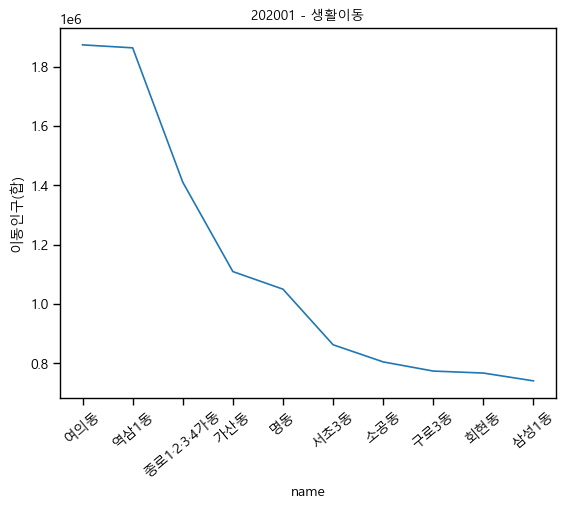

In [271]:
df_temp = df_출근.sort_values(by=['이동인구(합)'],ascending=False).head(10)
sns.lineplot(data = df_temp, x = 'name', y = '이동인구(합)')
plt.title('202001 - 생활이동')
plt.xticks(rotation=40);